# Implimenting required modules

In [1]:
import numpy as np
import pandas as pd
import os,os.path
import cv2
import matplotlib.pyplot as plt

# Loading the data

In [2]:
classes={"10":10,"20":20}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    path1 = "C:/Users/pushpa/Downloads/Indian currency dataset v1/training/"
    pth=os.path.join(path1,cls)
    print(pth)
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j)
        img =cv2.resize(img,(200,200))
        X.append(img)
        
        Y.append(classes[cls])

C:/Users/pushpa/Downloads/Indian currency dataset v1/training/10
C:/Users/pushpa/Downloads/Indian currency dataset v1/training/20


In [4]:
print(os.listdir(pth))

['20__0.jpg', '20__1.jpg', '20__10.jpg', '20__100.jpg', '20__101.jpg', '20__102.jpg', '20__103.jpg', '20__104.jpg', '20__105.jpg', '20__106.jpg', '20__107.jpg', '20__108.jpg', '20__109.jpg', '20__11.jpg', '20__110.jpg', '20__111.jpg', '20__112.jpg', '20__113.jpg', '20__114.jpg', '20__115.jpg', '20__116.jpg', '20__117.jpg', '20__118.jpg', '20__119.jpg', '20__12.jpg', '20__120.jpg', '20__121.jpg', '20__122.jpg', '20__123.jpg', '20__124.jpg', '20__125.jpg', '20__126.jpg', '20__127.jpg', '20__128.jpg', '20__129.jpg', '20__13.jpg', '20__130.jpg', '20__131.jpg', '20__132.jpg', '20__133.jpg', '20__134.jpg', '20__135.jpg', '20__136.jpg', '20__137.jpg', '20__138.jpg', '20__139.jpg', '20__14.jpg', '20__140.jpg', '20__141.jpg', '20__142.jpg', '20__143.jpg', '20__144.jpg', '20__145.jpg', '20__146.jpg', '20__147.jpg', '20__148.jpg', '20__149.jpg', '20__15.jpg', '20__150.jpg', '20__151.jpg', '20__152.jpg', '20__153.jpg', '20__154.jpg', '20__155.jpg', '20__156.jpg', '20__157.jpg', '20__158.jpg', '20_

In [5]:
np.unique(Y)

array([10, 20])

In [6]:
len(X)

922

In [7]:
len(Y)

922

In [8]:
a=pd.Series(Y).value_counts().sort_values()
a

20    450
10    472
dtype: int64

# Visualization

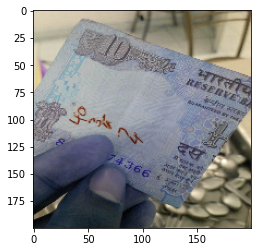

In [9]:
plt.imshow(X[9])

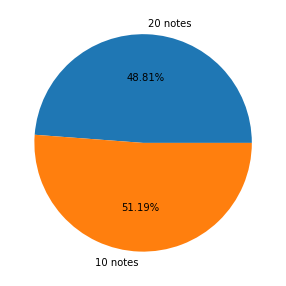

In [10]:
plt.figure(figsize=(5,5))
plt.pie(a,labels=["20 notes","10 notes"],autopct="%.2f%%")
plt.show()

# Data preprocessing

In [11]:
X=np.array(X)
Y=np.array(Y)
X.shape

(922, 200, 200, 3)

In [12]:
print(type(X))

<class 'numpy.ndarray'>


In [13]:
print(X.dtype)

uint8


In [14]:
X_updated=X.reshape(len(X),-1)
X_updated.shape

(922, 120000)

In [15]:
print(type(X_updated))

<class 'numpy.ndarray'>


# SPLITTING THE DATA

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X_updated,Y,random_state=10,test_size=0.1)

In [18]:
x_train.shape

(829, 120000)

In [19]:
x_test.shape

(93, 120000)

# MODEL DEVELOPMENT

 #### SUPPORT VECTOR MACHINE

In [20]:
from sklearn.svm import SVC
sv = SVC()


In [21]:
y_train.shape

(829,)

In [22]:
model=sv.fit(x_train,y_train)

In [23]:
y_pred=model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
score1=accuracy_score(y_test,y_pred)

In [26]:
score1

0.7956989247311828

# LOGISTIC REGRESSION

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lg = LogisticRegression(solver='lbfgs',max_iter=1000)

In [29]:
lg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [30]:
y_pred1=lg.predict(x_test)

In [31]:
score12=accuracy_score(y_test,y_pred1)

In [32]:
score12

0.7419354838709677

# DECISION TREE

In [33]:
from sklearn import tree

In [34]:
clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred_train=clf.predict(x_test)

In [35]:
score123=accuracy_score(y_test,y_pred_train)

In [36]:
score123

0.6236559139784946

# K NEAREST NIGHBORS ALGORITHM

In [37]:
from sklearn.neighbors import KNeighborsClassifier 

In [38]:
knn = KNeighborsClassifier(n_neighbors=2)

In [39]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [40]:
y_pred_1=clf.predict(x_test)

In [41]:
score1234=accuracy_score(y_test,y_pred_1)

In [42]:
score1234

0.6236559139784946

# Predicting the image whether it is a 10 or 20 rs

(2592, 1944, 3)


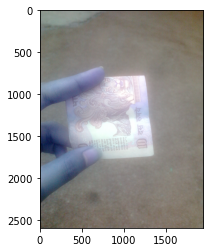

In [43]:
img2=cv2.imread("10__0.jpg")
plt.imshow(img2)
print(img2.shape)

In [44]:
img2 =cv2.resize(img2,(40000,3))
print(img2.T)
print(img2.ndim)
print(img2.shape)
img2=img2.reshape(len(img2),-1)
print(img2.ndim)
print(img2.shape)

[[[116 125  12]
  [116 125  12]
  [116 125  12]
  ...
  [111 128 138]
  [111 128 138]
  [111 128 138]]

 [[126 123  52]
  [126 123  52]
  [126 123  52]
  ...
  [110 127 137]
  [110 127 137]
  [110 127 137]]

 [[109 126  90]
  [109 126  90]
  [109 126  90]
  ...
  [ 75 114 124]
  [ 75 114 124]
  [ 75 114 124]]]
3
(3, 40000, 3)
2
(3, 120000)


In [45]:
pred = model.predict(img2)
pred

array([10, 10, 10])

(201, 470, 3)


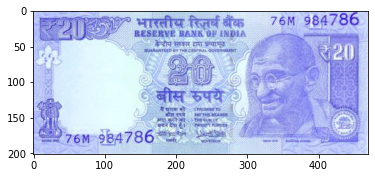

In [46]:
img3=cv2.imread("20__65.jpg")
plt.imshow(img3)
print(img3.shape)

In [47]:
img3 =cv2.resize(img3,(40000,3))
print(img3.T)
print(img3.ndim)
print(img3.shape)
img3=img3.reshape(len(img3),-1)
print(img3.ndim)
print(img3.shape)

[[[174 192 175]
  [174 192 175]
  [174 192 175]
  ...
  [199 217 229]
  [199 217 229]
  [199 217 229]]

 [[186 203 184]
  [186 203 184]
  [186 203 184]
  ...
  [212 228 240]
  [212 228 240]
  [212 228 240]]

 [[255 253 247]
  [255 253 247]
  [255 253 247]
  ...
  [250 255 255]
  [250 255 255]
  [250 255 255]]]
3
(3, 40000, 3)
2
(3, 120000)


In [49]:
pred_1 = model.predict(img3)
pred_1

array([20, 20, 20])